In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
% matplotlib notebook

In [3]:
import professor2 as prof

In [4]:
from ipywidgets import *

In [5]:
from ipywidgets import interact

In [6]:
IFILE='/home/hschulz/src/professor-clean/jupyter/ipol_test.dat'

In [7]:
METADATA, IHISTOS = prof.read_ipolhistos(IFILE)


In [8]:
PNAMES=METADATA['ParamNames'].split()

In [9]:
VMIN = map(float, METADATA['MinParamVals'].split())

In [10]:
VMAX = map(float, METADATA['MaxParamVals'].split())

In [11]:
STEPS=20.

In [12]:
SLIDERS={p:
         FloatSlider(description=p,
                     min=VMIN[num],
                     max=VMAX[num],
                     step=(VMAX[num] - VMIN[num])/STEPS
         )
         for num, p in enumerate(PNAMES)}

In [22]:
def mk_line(**kwargs):
    """
    Prepare points for matplotlib step
    """
    ppoint = [kwargs[x] for x in kwargs['order']]
    Y=[]
    for b in IHISTOS[kwargs['c_obs'].value].bins:
        y = b.val(ppoint)
        Y.append(y)
        Y.append(y)
        
    if not kwargs['fig'].axes[0].lines:
    # print "nothing"
    #if len(kwargs['fig'].axes)==0:
        X = []
        for b in IHISTOS[kwargs['c_obs'].value].bins:
            X.append(b.xmin)
            X.append(b.xmax)
        kwargs['fig'].axes[0].step(X, Y, color="r", where="post")
        ax = plt.gca()  # get the current axes
        ax.relim()      # make sure all the data fits
        ax.autoscale()
        fig.canvas.set_window_title(kwargs['c_obs'].value)
    else:
        kwargs['fig'].axes[0].lines[0].set_ydata(Y)
        
      
    


In [30]:
def update_obs(change):
    fig.axes[0].lines=[]
    

<IPython.core.display.Javascript object>


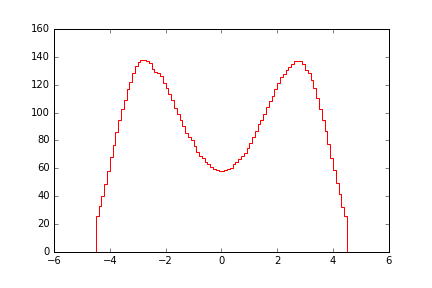

In [31]:
fig, ax= plt.subplots()

In [16]:
c_obs=Dropdown(description="Obs", options=IHISTOS.keys())

In [32]:
arguments = {'order':fixed(PNAMES), 'c_obs':fixed(c_obs), 'fig':fixed(fig)}

In [33]:
c_obs.observe(update_obs)


In [34]:
display(c_obs)

In [35]:
for pname in PNAMES:
    arguments[pname]=SLIDERS[pname]

In [36]:
interact(mk_line, **arguments)